### 產生特徵向量函式庫

In [1]:
import numpy as np
import cv2
import math
from scipy import ndimage
from matplotlib import pyplot as plt
import pandas as pd


isPlot=False
idDebug=False
STEP=1 #每次多少角度
granularity=int(180/STEP)

def imgWrapA(orgImg,a):
    img_a = ndimage.rotate(orgImg, a, reshape=False)    
    return img_a
        
def get_upsmapleMap(bigMap):
    bigMap="img/map_2d.png"
    img=cv2.imread(bigMap)
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, 0, 20)
    noisy_img = cv2.add(img, noise)

    orgImg = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
    print('orgImg shape=',orgImg.shape)
    # 获取原始图像的宽度和高度


    # 定义上采样倍数
    scale = 4

    # 计算上采样后的宽度和高度
    upscaled_size = (orgImg.shape[1] * scale, orgImg.shape[0] * scale)

  
    # 进行上采样
    upsampled_image = cv2.resize(orgImg, upscaled_size, interpolation=cv2.INTER_LANCZOS4)

    print('upsampled_image shape=',upsampled_image.shape)
    return upsampled_image

    #Question

def test_gen(upsmapleMap,a, x,y):

    orgImg_crop480=upsmapleMap[y-250: y + 250, x-250: x + 250 ]
    
    #print(orgImg_crop480.shape)

    if isPlot: plt.imshow(orgImg_crop480)
    orgImg_crop480_a33=imgWrapA(orgImg_crop480,a)
    #print('imgWrapA shape=',orgImg_crop128_a33.shape)
    orgImg_crop480_a33_crop=orgImg_crop480_a33[int(130): int(370), int(70): int(430)]

    return orgImg_crop480_a33_crop




### 特徵向量觀察工具

In [43]:


def plot4view(s_result_all):
    plt.subplots(1,4,figsize=(10,3))    
    for i in range(4):
        plt.subplot(141+i)
        plt.plot(s_result_all[1+0+i*6,0:granularity], label = "l1")# 1 表示為 角度（答案）
        plt.plot(s_result_all[1+1+i*6,0:granularity], label = "l2")# 1 表示為 角度（答案）
        plt.plot(s_result_all[1+2+i*6,0:granularity], label = "l3")
        plt.plot(s_result_all[1+3+i*6,0:granularity], label = "l4")
        plt.plot(s_result_all[1+4+i*6,0:granularity], label = "l5")
        plt.plot(s_result_all[1+5+i*6,0:granularity], label = "l6")
        plt.legend()
    plt.show()



### 生成數據集合函數

In [3]:
from main import allFeature

def mass_sample(times, xlist, ylist):
    upsmapleMap=get_upsmapleMap("img/map_2d.png")

    s_result_all=np.zeros([1+24,times*granularity+1],int)# [0] 表示為 角度（答案）
    for i in range(times):
        if i%10 == 0:
            print('times=',i)
        for a in range(0,granularity+1,STEP):
        #for a in range(90,91,STEP):
            testImg=test_gen(upsmapleMap, a,xlist[i],ylist[i])
            #print(testImg.shape)
            #if a==90:
            #    plt.imshow(testImg)
            s_result_all[1:25,a+i*granularity]=allFeature(testImg)
            s_result_all[0,a+i*granularity]=a
            
            
            #print(s_result_all[:,a+i*granularity])

    return s_result_all

### 驗證

orgImg shape= (495, 500)
upsampled_image shape= (1980, 2000)
times= 0


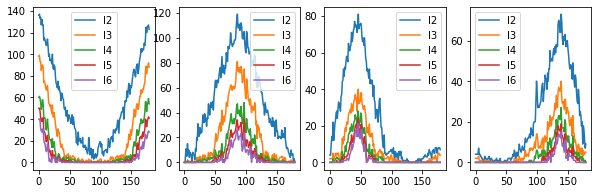

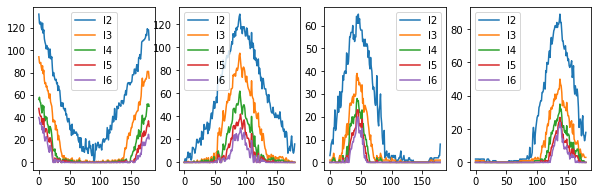

In [36]:
xlist=[310,300]
ylist=[250,333]
s_result_all=mass_sample(2, xlist, ylist)
#print(s_result_all[:,90])
plot4view(s_result_all[:,0:granularity])
plot4view(s_result_all[:,granularity:2*granularity])
DF = pd.DataFrame(np.transpose(s_result_all))
 
# save the dataframe as a csv file
DF.to_csv("s_result_all.csv")

(25, 18000)


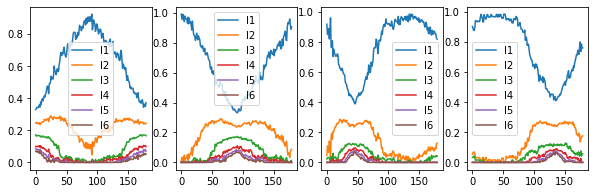

In [63]:
def normArray(s_result_all, n):
    s_result_all_f=s_result_all.astype(float)
    s_result_all_norm=s_result_all_f
    print(s_result_all_norm.shape)
    for i in range(n*granularity):
        avg=s_result_all_f[1:7,i]/(sum(s_result_all_f[1:7,i])+1)
        s_result_all_norm[1:7,i]=avg
        s_result_all_norm[7:13,i]=s_result_all_f[7:13,i]/(sum(s_result_all_f[7:13,i])+1)
        s_result_all_norm[13:19,i]=s_result_all_f[13:19,i]/(sum(s_result_all_f[13:19,i])+1)
        s_result_all_norm[19:25,i]=s_result_all_f[19:25,i]/(sum(s_result_all_f[19:25,i])+1)
    return s_result_all_norm

def normArray_fp(s_result_all, n):
    s_result_all_f = s_result_all.astype(float)
    s_result_all_norm = s_result_all_f
    
    def compute_avg(idx):
        return s_result_all_f[idx, :] / (np.sum(s_result_all_f[idx, :], axis=0) + 1)

    idx_list = [slice(1, 7), slice(7, 13), slice(13, 19), slice(19, 25)]

    avg_array = np.vstack(map(compute_avg, idx_list))

    idx_tuple = np.ix_(*(idx_list + [range(n*granularity)]))
    s_result_all_norm[idx_tuple] = np.divide(s_result_all_f[idx_tuple].astype(int), avg_array)

    return s_result_all_norm



s_result_all_norm=normArray(s_result_all,2)
plot4view(s_result_all_norm[:,0:granularity])

In [38]:
print(s_result_all)
print(s_result_all[1:7,0])
print((sum(s_result_all[1:7,i])+1))
print(s_result_all[1:7,0]/(sum(s_result_all[1:7,i])+1))

[[  0   1   2 ... 178 179 180]
 [192 192 186 ... 171 159 171]
 [136 137 133 ... 118 109 124]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[192 136  98  60  50  40]
577
[0.33275563 0.23570191 0.16984402 0.10398614 0.08665511 0.06932409]


### 生成數據集合

In [5]:
RANGE=1400 #2000-600
END=300

#測試用數據集合
tryNumber=100
xlist=np.around(np.random.rand(tryNumber)*RANGE+END).astype(int)
ylist=np.around(np.random.rand(tryNumber)*RANGE+END).astype(int)
s_result_all=mass_sample(tryNumber, xlist, ylist)
DF = pd.DataFrame(np.transpose(s_result_all))
DF.to_csv("C_s_result_all_100.csv")

#訓練用數據集合
tryNumber=1000
xlist=np.around(np.random.rand(tryNumber)*RANGE+END).astype(int)
ylist=np.around(np.random.rand(tryNumber)*RANGE+END).astype(int)
s_result_all=mass_sample(tryNumber, xlist, ylist)
DF = pd.DataFrame(np.transpose(s_result_all))
DF.to_csv("C_s_result_all_1000.csv")


orgImg shape= (495, 500)
upsampled_image shape= (1980, 2000)
times= 0
times= 10
times= 20
times= 30
times= 40
times= 50
times= 60
times= 70
times= 80
times= 90
orgImg shape= (495, 500)
upsampled_image shape= (1980, 2000)
times= 0
times= 10
times= 20
times= 30
times= 40
times= 50
times= 60
times= 70
times= 80
times= 90
times= 100
times= 110
times= 120
times= 130
times= 140
times= 150
times= 160
times= 170
times= 180
times= 190
times= 200
times= 210
times= 220
times= 230
times= 240
times= 250
times= 260
times= 270
times= 280
times= 290
times= 300
times= 310
times= 320
times= 330
times= 340
times= 350
times= 360
times= 370
times= 380
times= 390
times= 400
times= 410
times= 420
times= 430
times= 440
times= 450
times= 460
times= 470
times= 480
times= 490
times= 500
times= 510
times= 520
times= 530
times= 540
times= 550
times= 560
times= 570
times= 580
times= 590
times= 600
times= 610
times= 620
times= 630
times= 640
times= 650
times= 660
times= 670
times= 680
times= 690
times= 700
times= 71

### Normalize

(25, 18000)
(25, 18000)
[179 172 121  84  51  43  36 126  10   0   0   0   0  82   8   2   0   0
   0  85  13   2   1   0   0]
[1.790e+02 3.386e-01 2.382e-01 1.654e-01 1.004e-01 8.460e-02 7.090e-02
 9.197e-01 7.300e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.817e-01
 8.600e-02 2.150e-02 0.000e+00 0.000e+00 0.000e+00 8.333e-01 1.275e-01
 1.960e-02 9.800e-03 0.000e+00 0.000e+00]


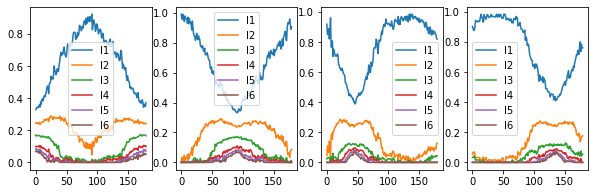

(25, 180000)
(25, 180000)
[179 186 136  98  57  44  31 123   6   0   0   0   0  69   2   1   0   0
   0  84   5   1   0   0   0]
[1.790e+02 3.363e-01 2.459e-01 1.772e-01 1.031e-01 7.960e-02 5.610e-02
 9.462e-01 4.620e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.452e-01
 2.740e-02 1.370e-02 0.000e+00 0.000e+00 0.000e+00 9.231e-01 5.490e-02
 1.100e-02 0.000e+00 0.000e+00 0.000e+00]


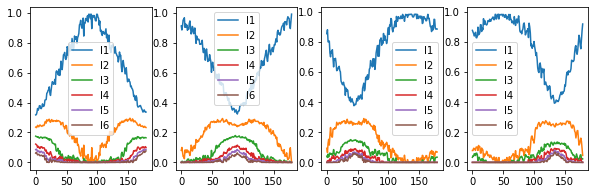

In [67]:
def normCSV(fName, tryNumber, out_fName):
    df = pd.read_csv(fName, index_col=0)
    s_result= np.array(df)
    s_result_all=np.transpose(s_result[0:180*tryNumber,:])
    s_result_all_norm=normArray(s_result_all,tryNumber)
    s_result_all_norm=np.round(s_result_all_norm,4)
    print(s_result_all.shape)
    print(s_result_all[:,-1])
    print(s_result_all_norm[:,-1])
    DF = pd.DataFrame(np.transpose(s_result_all_norm))
    DF.to_csv(out_fName)


normCSV("C_s_result_all_100.csv", 100,"C_s_result_all_100_norm.csv" )
df = pd.read_csv("C_s_result_all_100_norm.csv", index_col=0)
s_result= np.array(df)
s_result_all=np.transpose(s_result[0:180*tryNumber,:])
plot4view(s_result_all[:,0:granularity])

normCSV("C_s_result_all_1000.csv", 1000,"C_s_result_all_1000_norm.csv" )
df = pd.read_csv("C_s_result_all_1000_norm.csv", index_col=0)
s_result= np.array(df)
s_result_all=np.transpose(s_result[0:180*tryNumber,:])
plot4view(s_result_all[:,0:granularity])
